## Basics of Data Wrangling

In [9]:
import pandas as pd
Cars = pd.read_csv("usedcars.csv")
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
Cars.columns = headers
Cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [11]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [12]:
#Lets just work on cleaning the column titled "normalized losses" to make sure everything can statistically anlalyzed. Current the data type is object
Cars["normalized-losses"].unique()# turns out we have questionmark

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

Replacing the missing value with average

In [16]:
#We need to prepare the data for finding the mean value before the "?" can be replaced with the mean
import numpy as np
Cars["normalized-losses"] = Cars["normalized-losses"].replace("?", np.nan).astype(float)
Cars["normalized-losses"].head() 

0      NaN
1      NaN
2    164.0
3    164.0
4      NaN
Name: normalized-losses, dtype: float64

In [17]:
#Now lets find the mean
nl_mean = Cars["normalized-losses"].mean()
Cars["normalized-losses"] = Cars["normalized-losses"].replace(np.nan, nl_mean)
Cars["normalized-losses"].head()
#So, this deals with the missing value in the column of choice

0    122.0
1    122.0
2    164.0
3    164.0
4    122.0
Name: normalized-losses, dtype: float64

In [18]:
#Cars["bore"].unique()
import numpy as np
Cars["bore"].replace("?", np.nan, inplace=True) 

C:\Users\prien\AppData\Local\Temp\ipykernel_1480\2558093519.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cars["bore"].replace("?", np.nan, inplace=True)


In [19]:
Cars["bore"].bfill(inplace = True)
Cars["bore"].unique()

C:\Users\prien\AppData\Local\Temp\ipykernel_1480\4260004161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cars["bore"].bfill(inplace = True)


array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '3.39', '3.76', '3.58', '3.46', '3.80', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

Replacing the missing value with most frequent value especially for object types

In [23]:
#Now working with object type columns
Cars["num-of-doors"].unique()

array(['two', 'four', '?'], dtype=object)

In [24]:
#We are certaining averaging 2 nad 4 to fill the "?" value so we choose to fll the missing data with the most popular number of doors
Cars["num-of-doors"].value_counts() #turns out four door cars are most popular

num-of-doors
four    114
two      88
?         2
Name: count, dtype: int64

In [27]:
Cars["num-of-doors"].replace("?", "four", inplace=True)
Cars["num-of-doors"].value_counts() #so the job is done without having to convert the datatype into integer or float

C:\Users\prien\AppData\Local\Temp\ipykernel_1480\98901155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cars["num-of-doors"].replace("?", "four", inplace=True)


num-of-doors
four    116
two      88
Name: count, dtype: int64

Deleting the missing value by referring to a specific column of interest

In [29]:
#Now we have to delete all records of which the price points are missing. If there are missing values in other uncleaned columns we will keep it as it is
#Cars.columns
Cars["price"].unique()

array(['16500', '13950', '17450', '15250', '17710', '18920', '23875', '?',
       '16430', '16925', '20970', '21105', '24565', '30760', '41315',
       '36880', '5151', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8558', '8921', '12964', '6479', '6855', '5399',
       '6529', '7129', '7295', '7895', '9095', '8845', '10295', '12945',
       '10345', '6785', '11048', '32250', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16900', '16695',


In [32]:
import numpy as np
Cars["price"].replace("?", np.nan, inplace=True) # remember unless we are replacing a value with a descriptive statistic such as mean. we dont need to convert the
                                                 # data type into numerical format  

C:\Users\prien\AppData\Local\Temp\ipykernel_1480\2654589673.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cars["price"].replace("?", np.nan, inplace=True) # remember unless we are replacing a value with a descriptive statistic such as mean. we dont need to convert the


In [33]:
Cars.dropna(subset = ["price"], axis = 0, inplace = True) #realize that even if price is a column we are using axis = 0 before we are operating on rows based on
                                                          #missing value in price series. And, we normally drop the unavailable regressand than fill it with
                                                          #different methods
Cars["price"].unique()

array(['16500', '13950', '17450', '15250', '17710', '18920', '23875',
       '16430', '16925', '20970', '21105', '24565', '30760', '41315',
       '36880', '5151', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8558', '8921', '12964', '6479', '6855', '5399',
       '6529', '7129', '7295', '7895', '9095', '8845', '10295', '12945',
       '10345', '6785', '11048', '32250', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16900', '16695',
     

Reformatting the data type for statistical analysis

In [36]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    float64
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non-null

In [37]:
#Lets get bore, stroke, horsepower, peak-rpm, and price 
try: #try because i have hunch that inplace will not work in astype function
    Cars[["bore", "price"]].astype(float, inplace=True)
except:
    print("error")

error


In [39]:
Cars["bore"] = Cars["bore"].astype(float)
Cars["price"] = Cars["price"].astype(float)
Cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    float64
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non-null

In [40]:
#lets convert mpg into kilometers per litre
Cars.rename(columns = {"city-mpg":"city-kpl", "highway-mpg":"highway-kpl"}, inplace = True)

In [41]:
Cars["city-kpl"] = Cars["city-kpl"]*0.4251 #converting mpg to kpl)
Cars["highway-kpl"] = Cars["highway-kpl"]*0.4251
Cars[["city-kpl", "highway-kpl"]].head()

,city-kpl,highway-kpl
0,8.9271,11.4777
1,8.0769,11.0526
2,10.2024,12.7530
3,7.6518,9.3522
4,8.0769,10.6275


In [42]:
Cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kpl,highway-kpl,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,8.9271,11.4777,16500.0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,8.0769,11.0526,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,10.2024,12.7530,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,7.6518,9.3522,17450.0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,8.0769,10.6275,15250.0


### Normalization of data

In [46]:
#It appears that we need to input "bore", "stroke", and "compression ratio" in a mathematical formula, and therefore they need to be normalized
Cars["bore"].info()

<class 'pandas.core.series.Series'>
Index: 200 entries, 0 to 203
Series name: bore
Non-Null Count  Dtype  
--------------  -----  
200 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [47]:
import numpy as np
Cars["stroke"].replace("?", np.nan, inplace=True)
Cars["stroke"] = Cars["stroke"].astype(float)
stroke_mean = Cars["stroke"].mean()
Cars["stroke"].replace(np.nan, stroke_mean, inplace=True)
Cars["stroke"].unique()

C:\Users\prien\AppData\Local\Temp\ipykernel_1480\3416508050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cars["stroke"].replace("?", np.nan, inplace=True)
C:\Users\prien\AppData\Local\Temp\ipykernel_1480\3416508050.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

array([2.68      , 3.47      , 3.4       , 2.8       , 3.19      ,
       3.39      , 3.03      , 3.11      , 3.23      , 3.46      ,
       3.9       , 3.41      , 3.07      , 3.58      , 4.17      ,
       2.76      , 3.15      , 3.25984694, 3.16      , 3.64      ,
       3.1       , 3.35      , 3.12      , 3.86      , 3.29      ,
       3.27      , 3.52      , 2.19      , 3.21      , 2.9       ,
       2.07      , 2.36      , 2.64      , 3.08      , 3.5       ,
       3.54      , 2.87      ])

In [50]:
Bore_N = (Cars["bore"] - Cars["bore"].min())/(Cars["bore"].max()-Cars["bore"].min())
Stroke_N =(Cars["stroke"] - Cars["stroke"].min())/(Cars["stroke"].max()-Cars["stroke"].min())
Compression_ratio_N = (Cars["compression-ratio"] - Cars["compression-ratio"].min())/(Cars["compression-ratio"].max() - Cars["compression-ratio"].min()) 

In [51]:
Normalized = pd.DataFrame([Bore_N, Stroke_N, Compression_ratio_N])
Normalized = Normalized.T
Names = ["Bore_N", "Stroke_N", "Compression_ration_N"]
Normalized.columns = Names
Normalized.head()

,Bore_N,Stroke_N,Compression_ration_N
0,0.664286,0.290476,0.12500
1,0.100000,0.666667,0.12500
2,0.464286,0.633333,0.18750
3,0.464286,0.633333,0.06250
4,0.464286,0.633333,0.09375


In [52]:
Cars = pd.merge(Cars, Normalized, how="outer", left_index=True, right_index=True)
Cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-kpl',
       'highway-kpl', 'price', 'Bore_N', 'Stroke_N', 'Compression_ration_N'],
      dtype='object')

In [53]:
To_drop = Cars[["bore", "stroke", "compression-ratio"]] #Meanwhile, lets get rid of the original values of the given columns
Cars.drop(To_drop, axis=1, inplace=True)

In [55]:
Cars.head() #We can see the normalized value in the last three columns

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,horsepower,peak-rpm,city-kpl,highway-kpl,price,Bore_N,Stroke_N,Compression_ration_N
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,111,5000,8.9271,11.4777,16500.0,0.664286,0.290476,0.12500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,154,5000,8.0769,11.0526,16500.0,0.100000,0.666667,0.12500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,102,5500,10.2024,12.7530,13950.0,0.464286,0.633333,0.18750
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,115,5500,7.6518,9.3522,17450.0,0.464286,0.633333,0.06250
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,110,5500,8.0769,10.6275,15250.0,0.464286,0.633333,0.09375


### Binning

In [60]:
#Lets assume that the car price does not need a continuous scaled value in horsepower but three ranges for determination. Hence, lets change the horsepower
#value into "High", "Medium", and "Low" range
print(Cars["horsepower"].unique())
print(Cars["horsepower"].nunique()) #59 unique values with a non-numeric values
print(Cars["horsepower"].dtype)

['111' '154' '102' '115' '110' '140' '101' '121' '182' '48' '70' '68' '88'
 '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135' '84' '64'
 '120' '72' '123' '155' '184' '175' '116' '69' '55' '97' '152' '160' '200'
 '95' '142' '143' '207' '?' '73' '82' '94' '62' '56' '112' '92' '161'
 '156' '52' '85' '114' '162' '134' '106']
59
object


In [61]:
import numpy as np
Cars["horsepower"].replace("?", np.nan, inplace=True)

C:\Users\prien\AppData\Local\Temp\ipykernel_1480\1997322454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cars["horsepower"].replace("?", np.nan, inplace=True)


In [62]:
#Cars["horsepower"] = Cars["horsepower"].astype(int)
Cars["horsepower"] = Cars["horsepower"].astype(float)
Cars["horsepower"].replace(np.nan, Cars["horsepower"].mean(), inplace=True) 

C:\Users\prien\AppData\Local\Temp\ipykernel_1480\3879790278.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cars["horsepower"].replace(np.nan, Cars["horsepower"].mean(), inplace=True)


In [63]:
#Now, we want to create 3 bins to bin all 59 different horsepower data into High, Medium, Low
bin_value = np.linspace(Cars["horsepower"].min(), Cars["horsepower"].max(), 4) #we needto create  4 seperate bins because we need four data points to accomodate 3bars in a histogram
bin_value

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [64]:
Bin_type = ["Low", "Medium", "High"] 
Cars["horsepower-binned"] = pd.cut(Cars["horsepower"], bin_value, labels=Bin_type, include_lowest=True)
Cars[["horsepower", "horsepower-binned"]].head(10)
Cars.drop("horsepower", axis=1, inplace=True) #we dont need the elaborated version of horsepower column anymore

In [76]:
#Lets count the number of values that got binned in certain bin
Cars["horsepower-binned"].value_counts()

horsepower-binned
Low       152
Medium     43
High        5
Name: count, dtype: int64

(array([152.,   0.,   0.,   0.,   0.,  43.,   0.,   0.,   0.,   5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

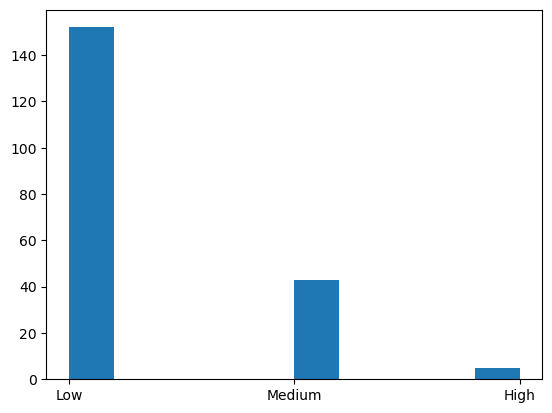

In [78]:
import matplotlib.pyplot as plt
plt.hist(Cars["horsepower-binned"]) 

### Assigning Indicators to Categorical Variables
##### Assigning indicators to Categorical variables helps in bringing them into regression analysis

In [80]:
#Lets get the indicator values for fuel type 
Dummy_variables = pd.get_dummies(Cars["fuel-type"]) #later in Machine Learning notebook, we shall learn how to assign indicators to multiple categories at once through 
                                                    #one hot encoding
Dummy_variables.head() #Converting the bool dtype of dummies to binary integers is detailed in Statistics in Python notebook

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [81]:
Dummy_variables.rename(columns={"diesel":"fueltype-diesel", "gas":"fueltype-gas"}, inplace=True)

In [82]:
Cars = pd.concat([Cars, Dummy_variables], axis=1)
Cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-kpl,highway-kpl,price,Bore_N,Stroke_N,Compression_ration_N,horsepower-binned,fueltype-diesel,fueltype-gas
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000,8.9271,11.4777,16500.0,0.664286,0.290476,0.12500,Low,False,True
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000,8.0769,11.0526,16500.0,0.100000,0.666667,0.12500,Medium,False,True
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,5500,10.2024,12.7530,13950.0,0.464286,0.633333,0.18750,Low,False,True
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,5500,7.6518,9.3522,17450.0,0.464286,0.633333,0.06250,Low,False,True
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,5500,8.0769,10.6275,15250.0,0.464286,0.633333,0.09375,Low,False,True


## Exploratory Data analysis

Working with continuous data (Integers and floats)

In [86]:
#Lets being with the quick observation of the correlation between the data types in the dataframe that are numerical (non-object type)
numeric_cars = Cars.select_dtypes(include=["int64", "float64"])
numeric_cars.corr() #this function seem to fall under pandas

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,city-kpl,highway-kpl,price,Bore_N,Stroke_N,Compression_ration_N
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.030158,0.041248,-0.083327,-0.137794,0.008244,-0.181073
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.225255,-0.182011,0.133999,-0.025934,0.055759,-0.114738
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,-0.480029,-0.552211,0.589147,0.498650,0.144675,0.249689
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,-0.667658,-0.700186,0.691044,0.608616,0.120888,0.159203
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,-0.638155,-0.684700,0.752795,0.547786,0.182855,0.189008
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,-0.057087,-0.111568,0.137284,0.179955,-0.081273,0.259526
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,-0.750390,-0.795515,0.834420,0.642965,0.168642,0.156444
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,-0.651002,-0.679877,0.872337,0.566646,0.208004,0.029005
city-kpl,-0.030158,-0.225255,-0.480029,-0.667658,-0.638155,-0.057087,-0.750390,-0.651002,1.000000,0.972024,-0.687186,-0.586976,-0.040677,0.330897
highway-kpl,0.041248,-0.182011,-0.552211,-0.700186,-0.684700,-0.111568,-0.795515,-0.679877,0.972024,1.000000,-0.705115,-0.595528,-0.040282,0.267929


In [87]:
Engine_specific = Cars[["Bore_N", "Stroke_N", "Compression_ration_N", "highway-kpl", "city-kpl"]]
Engine_specific_corr = Engine_specific.corr()
Engine_specific_corr

,Bore_N,Stroke_N,Compression_ration_N,highway-kpl,city-kpl
Bore_N,1.000000,-0.051062,0.001159,-0.595528,-0.586976
Stroke_N,-0.051062,1.000000,0.186761,-0.040282,-0.040677
Compression_ration_N,0.001159,0.186761,1.000000,0.267929,0.330897
highway-kpl,-0.595528,-0.040282,0.267929,1.000000,0.972024
city-kpl,-0.586976,-0.040677,0.330897,0.972024,1.000000


Conducting Exploratory Data Analysis through visualizations 

In [89]:
Cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'peak-rpm',
       'city-kpl', 'highway-kpl', 'price', 'Bore_N', 'Stroke_N',
       'Compression_ration_N', 'horsepower-binned', 'fueltype-diesel',
       'fueltype-gas'],
      dtype='object')

In [90]:
#Trying to conduct quick correlation nad regression analysis between "engine size" and "price of cars"
Quick_corr = Cars[["engine-size", "price"]]
Quick_corr = Quick_corr.corr()
Quick_corr

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


<Axes: xlabel='engine-size', ylabel='price'>

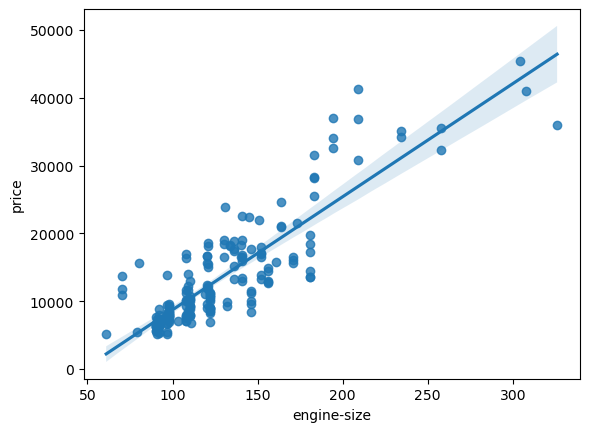

In [91]:
import matplotlib as plt
import seaborn as sns
sns.regplot(x="engine-size", y="price", data=Cars) #Note that the plot allows certain level of acceptable error bound when there isnt enough data at the topright corner 
#plt.ylim(0,) #limiting y-axis between 0 and what is comfortably necessary 
#strong corr of 0.8 is also accompanied by strong regression visualization

In [92]:
#Lets repeat the process for "peak-rpm" and "price". But, "peak-rpm" needs a quick data cleaning
Cars["peak-rpm"].unique()
Cars["peak-rpm"] = Cars["peak-rpm"].replace("?", np.nan).astype(float)

In [93]:
quick_corr1 = Cars[["peak-rpm", "price"]]
quick_corr1.corr() #a very weak negative correlation

,peak-rpm,price
peak-rpm,1.000000,-0.101625
price,-0.101625,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

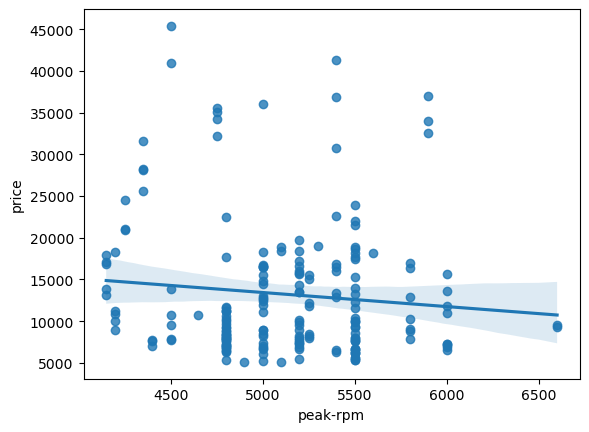

In [94]:
sns.regplot(x="peak-rpm", y="price", data=Cars)
#A weak correlating being accompanied by a weak regression

Working with Pearson Correlation Coefficient and P-value [SciPy]

In [102]:
#Finding Pearson Correlation coefficient between "Compression ratio" and "price"
from scipy import stats
pearson_coef, p_value = stats.pearsonr(Cars["Compression_ration_N"], Cars["price"])
print(f"The pearson coefficient is {pearson_coef} and the p-value is {p_value}")
#As we can see the correlation value of 0.07 and the p-value of 0.31 is turining out to be hopeless
#We are yet to learn to produce correlation and p-value matrix using this method

The pearson coefficient is 0.0711755917068172 and the p-value is 0.31656752744423394


#### Working with categorical data (int, objects)

In [105]:
#Let's observe the relationship between "body-style" and "price"
Cars["body-style"].value_counts() #value_counts is a smart way to visually inspect the value distribution across categories

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: count, dtype: int64

In [107]:
#The value counts loos very rich, lets convert it to a dataframe
Body_counts = Cars["body-style"].value_counts().to_frame()
Body_counts

,count
body-style,
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,5


<Axes: xlabel='body-style', ylabel='price'>

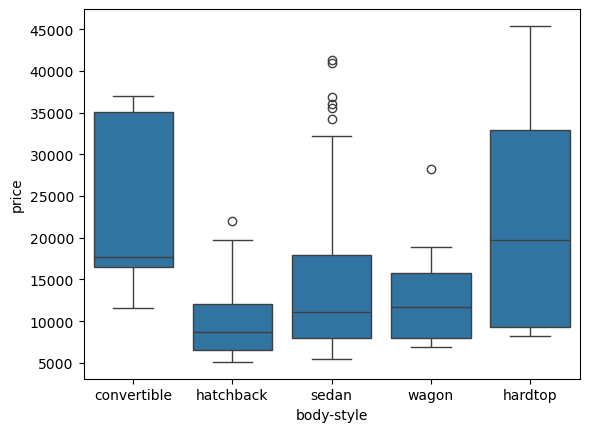

In [108]:
import matplotlib as pyplot
import seaborn as sns
sns.boxplot(x="body-style", y="price", data=Cars) #The price range overlaps way too much across the interquartile range of different body types. 
                                                  #Hence, body type is not a good predictor of car prices

In [109]:
#Lets observe the relationship between "horsepower-binned" and "price"
Cars["horsepower-binned"].value_counts() #The value is unevenly distributed and may not be a quality data to assign predictions

horsepower-binned
Low       152
Medium     43
High        5
Name: count, dtype: int64

<Axes: xlabel='horsepower-binned', ylabel='price'>

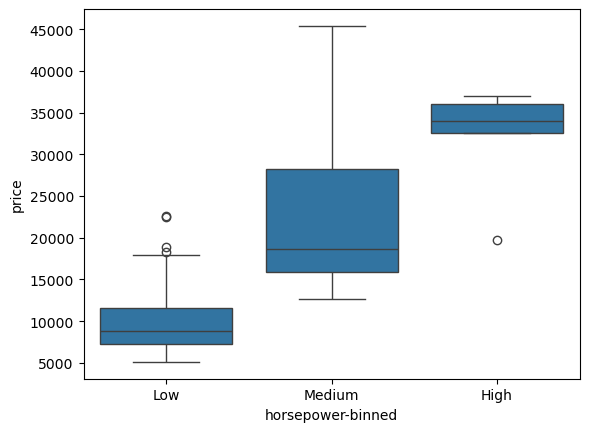

In [110]:
import matplotlib as pyplot
import seaborn as sns
sns.boxplot(x="horsepower-binned", y="price", data=Cars) # as you can see there is no overlap in price at the interquartile range between cars with different hrorsepower, 
                                                         #undoubtedly, horsepower range is a good categorical variable to predict car prices

Analysis of the categorical data through grouping 

In [112]:
#lets observe how does the price points of the Car varies based on drive wheels and horsepower-binned
Cars["drive-wheels"].value_counts() #not a very bad distribution of values

drive-wheels
fwd    118
rwd     74
4wd      8
Name: count, dtype: int64

In [113]:
Group_data1 = Cars[["drive-wheels", "horsepower-binned", "price"]]
Cars_grouped = Group_data1.groupby(["drive-wheels", "horsepower-binned"], as_index=False)["price"].mean() #If as_index is kept True we wont be able to create a pivot table from it later on
Cars_grouped #It seems to return a pretty fair pivoted table

C:\Users\prien\AppData\Local\Temp\ipykernel_1480\303024890.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Cars_grouped = Group_data1.groupby(["drive-wheels", "horsepower-binned"], as_index=False)["price"].mean() #If as_index is kept True we wont be able to create a pivot table from it later on


,drive-wheels,horsepower-binned,price
0,4wd,Low,10241.000000
1,4wd,Medium,NaN
2,4wd,High,NaN
3,fwd,Low,8647.138889
4,fwd,Medium,15699.300000
5,fwd,High,NaN
6,rwd,Low,13864.388889
7,rwd,Medium,24543.181818
8,rwd,High,31856.600000


In [114]:
#Let's get a better pivoted view. This matrix-style pivoting may be best for two kinds of categorical data and one ratio/interval numeric data
Cars_grouped_pivot = Cars_grouped.pivot(index="drive-wheels", columns = "horsepower-binned")
Cars_grouped_pivot

price                       
horsepower-binned           Low        Medium     High
drive-wheels                                          
4wd                10241.000000           NaN      NaN
fwd                 8647.138889  15699.300000      NaN
rwd                13864.388889  24543.181818  31856.6

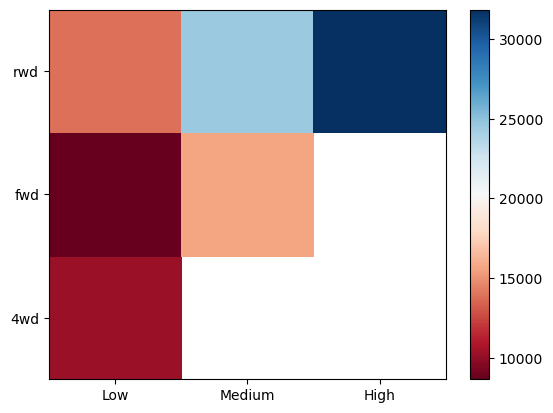

In [115]:
#So, lets view the grouped and pivoted values in heatmaps
#Caution: The code is complicated and might be explained in the data visualization course
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.pcolor(Cars_grouped_pivot, cmap='RdBu')

#label names
row_labels=Cars_grouped_pivot.columns.levels[1]
col_labels=Cars_grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(Cars_grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(Cars_grouped_pivot.shape[0])+0.5, minor=False)

#inserting labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
plt.show()

Filtering in data from further model development

In [117]:
# Gathering numerical variables with strong positive or negative correlation with the price function to develop a predictor model for price. 
cars_corr = numeric_cars.corr()
cars_corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,city-kpl,highway-kpl,price,Bore_N,Stroke_N,Compression_ration_N
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.030158,0.041248,-0.083327,-0.137794,0.008244,-0.181073
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.225255,-0.182011,0.133999,-0.025934,0.055759,-0.114738
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,-0.480029,-0.552211,0.589147,0.498650,0.144675,0.249689
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,-0.667658,-0.700186,0.691044,0.608616,0.120888,0.159203
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,-0.638155,-0.684700,0.752795,0.547786,0.182855,0.189008
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,-0.057087,-0.111568,0.137284,0.179955,-0.081273,0.259526
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,-0.750390,-0.795515,0.834420,0.642965,0.168642,0.156444
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,-0.651002,-0.679877,0.872337,0.566646,0.208004,0.029005
city-kpl,-0.030158,-0.225255,-0.480029,-0.667658,-0.638155,-0.057087,-0.750390,-0.651002,1.000000,0.972024,-0.687186,-0.586976,-0.040677,0.330897
highway-kpl,0.041248,-0.182011,-0.552211,-0.700186,-0.684700,-0.111568,-0.795515,-0.679877,0.972024,1.000000,-0.705115,-0.595528,-0.040282,0.267929


In [118]:
Cars_selected = (cars_corr["price"]>0.65) | (cars_corr["price"]<-0.65)
Cars_selected #selecting variables that have at least more than 0.65 or less than -0.65 correlation coefficient with the price 

symboling               False
normalized-losses       False
wheel-base              False
length                   True
width                    True
height                  False
curb-weight              True
engine-size              True
city-kpl                 True
highway-kpl              True
price                    True
Bore_N                  False
Stroke_N                False
Compression_ration_N    False
Name: price, dtype: bool

In [123]:
#But, better way to check correlation of values with price
cars_corr["price"].sort_values()

highway-kpl            -0.705115
city-kpl               -0.687186
symboling              -0.083327
Compression_ration_N    0.071176
Stroke_N                0.083296
normalized-losses       0.133999
height                  0.137284
Bore_N                  0.543059
wheel-base              0.589147
length                  0.691044
width                   0.752795
curb-weight             0.834420
engine-size             0.872337
price                   1.000000
Name: price, dtype: float64

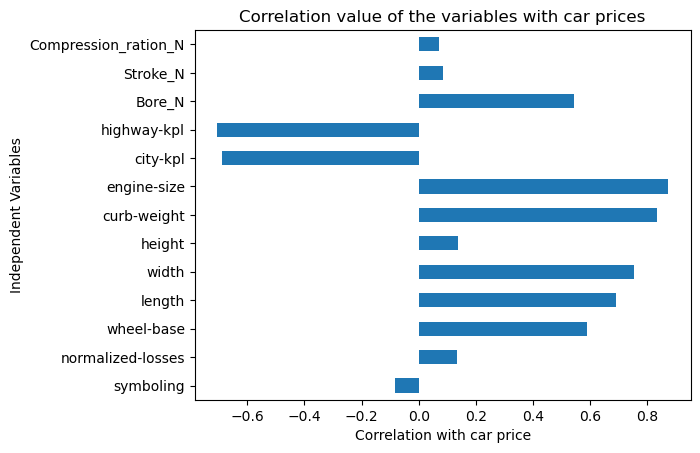

In [124]:
#The correlation between the independent variables and our dependent variable can also be viewed vistually through bar-histogram plotting
corr_graph = cars_corr["price"].drop("price") #this will give us the exact same list as above except for the price row
corr_graph.plot(kind = "barh")
plt.title("Correlation value of the variables with car prices")
plt.xlabel("Correlation with car price")
plt.ylabel("Independent Variables")
plt.show() #this visual can be used in reports

In [125]:
#Checking the p-value of the correlations to process the variable with another round of screening
from scipy import stats
p_value1 = stats.pearsonr(Cars["length"], Cars["price"])
p_value2 = stats.pearsonr(Cars["width"], Cars["price"])
p_value3 = stats.pearsonr(Cars["curb-weight"], Cars["price"])
p_value4 = stats.pearsonr(Cars["engine-size"], Cars["price"])
p_value5 = stats.pearsonr(Cars["city-kpl"], Cars["price"])
p_value6 = stats.pearsonr(Cars["highway-kpl"], Cars["price"])
p_value1, p_value2, p_value3, p_value4, p_value5, p_value6 
#all p-values expressed in scientific notation appears to be extremely small, and therefore significant

(PearsonRResult(statistic=np.float64(0.6910440897821906), pvalue=np.float64(9.960963222347693e-30)),
 PearsonRResult(statistic=np.float64(0.7527948631832608), pvalue=np.float64(8.256714148308725e-38)),
 PearsonRResult(statistic=np.float64(0.8344204348498462), pvalue=np.float64(3.969977536021817e-53)),
 PearsonRResult(statistic=np.float64(0.8723367498521142), pvalue=np.float64(1.8977171466561833e-63)),
 PearsonRResult(statistic=np.float64(-0.6871861020862687), pvalue=np.float64(2.729256568478904e-29)),
 PearsonRResult(statistic=np.float64(-0.7051147088046402), pvalue=np.float64(2.1973260531583354e-31)))

Axes(0.125,0.11;0.775x0.77)


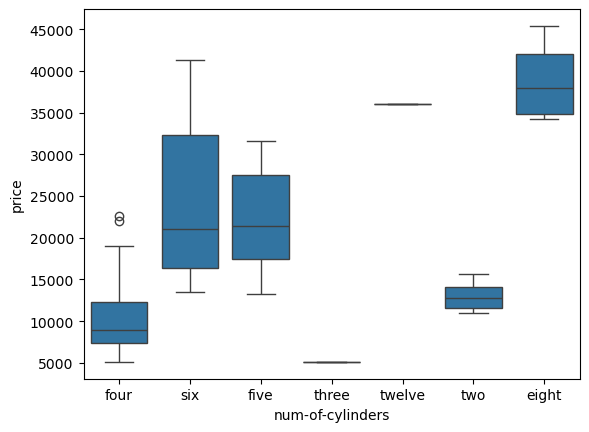

In [126]:
print(sns.boxplot(x="num-of-cylinders", y="price", data=Cars)) #was expecting num of cylinders as an ordinal variable to retain a pattern with price but not such found  

## Model Development

#### Simple Linear Regression Model

In [129]:
#As we have fairly identified variables that are likely to be predictors of car prices, let's begin by performing simple linear regression of the variables with the price 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [137]:
X = Cars[["length"]] #turns out we need double bracket outside of the feature to bring it under lm function
Y = Cars["price"]
lm.fit(X,Y) #training the model
Yhat = lm.predict(X)
print(Yhat.ndim) #Its a single dimension numpy array with one dim  
print(Yhat[0:6]) #In a one-dim array you may not need to to do [0, 0:6] to get 5 consecutive values as would be required for multiple dimensional matrix. 
                 #So, it returns five predicted value of car price amid consecutive value of car length 
print(lm.intercept_)
print(lm.coef_)

1
[10785.36680388 11855.51707482 14263.35518445 14263.35518445
 14575.48234681 21442.27991871]
-64481.86891930549
[445.89594623]


In [141]:
X = Cars[["width"]]
lm.fit(X,Y)
print(lm.intercept_)
print(lm.coef_)

-174736.03633057085
[2852.00956525]


In [142]:
X = Cars[["curb-weight"]]
lm.fit(X,Y)
print(lm.intercept_)
print(lm.coef_)

-19555.643457210303
[12.8189026]


In [143]:
X = Cars[["engine-size"]]
lm.fit(X,Y)
print(lm.intercept_)
print(lm.coef_)

-7962.440979163099
[166.8621392]


In [144]:
X=Cars[["city-kpl"]]
lm.fit(X,Y)
print(lm.intercept_)
print(lm.coef_)

34653.8421399077
[-2002.15748861]


In [145]:
X=Cars[["highway-kpl"]]
lm.fit(X,Y)
print(lm.intercept_)
print(lm.coef_)

38470.637005496676
[-1935.6114609]


#### Multiple Linear Regression Model

Checking for multicollinearity through visual inspection

In [150]:
Z = Cars[["width", "curb-weight", "engine-size", "city-kpl", "highway-kpl"]]
Y = Cars["price"]
Yhat = lm.fit(Z,Y)
print(lm.intercept_)
print(lm.coef_)

-39367.56626004109
[ 530.43968804    2.33683764  110.80665419 -782.63160851  457.61418949]


i.e., Z = 530.44x1 + 2.337x2 + 110.807x3 - 782.632x4 + 457.614x5-39367.57 - 39367.567

Cars[["width", "curb-weight", "engine-size", "city-kpl", "highway-kpl"]]

#### Polynomial Regression Model - Simple Linear Regression Model

Polynomial regressions are a way to be the linear regression lines to make it fit across the scatter plot. Honestly, its like cheating in a tic-tac-toe game. 
Hence, it is important to use right discretion to leverage polynomial regression line to get a better fit, and use it to right advantage. It is important to be able to
explain the curvilinearity pattern of the regression line when deploying polynomial equation in terms of bell curve pattern, elasticity etc, and leave enough room for noise.
But simply adding higher degree of  polynomials to bend the regression line all over the place to capture the scatter plots can only cause overfitting and lack of pattern

<Axes: xlabel='highway-kpl', ylabel='price'>

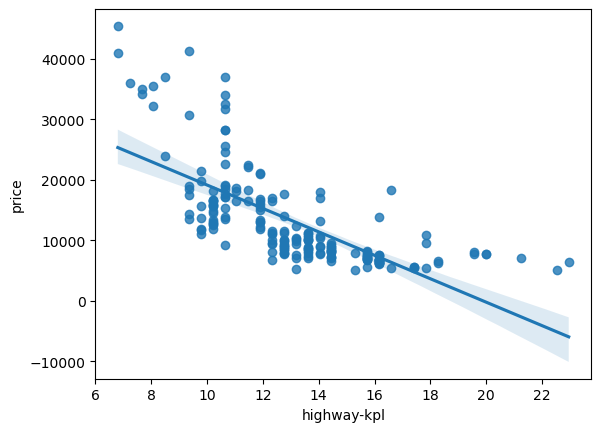

In [159]:
import seaborn as sns
sns.regplot(x=Cars["highway-kpl"], y=Cars["price"])
#Let's try to fit the line through the scatterplots more appropriately through the use of polynomials

In [160]:
Cars["highway-kpl"].describe()

count    200.000000
mean      13.052696
std        2.902254
min        6.801600
25%       10.627500
50%       12.753000
75%       14.453400
max       22.955400
Name: highway-kpl, dtype: float64

In [161]:
#At first, we need to develop a polynomial model between the given variables 
import numpy as np
x = Cars["highway-kpl"]
y = Cars["price"]

f = np.polyfit(x, y, 3) #creating a model with the degree value of 3 (upto x-cubed)
p = np.poly1d(f)
print(p) #so this is the nonlinear equation or (model) that we have to fit in the earlier developed visualization function

       3        2
-20.2 x + 1130 x - 2.105e+04 x + 1.378e+05


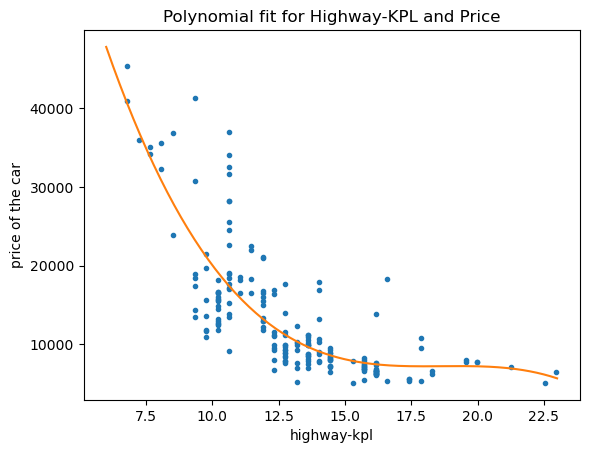

In [162]:
#It appears we need to create a function especially for visual plotting to impose our variables
import matplotlib.pyplot as plt
def Plotpoly(model, independent_variable, dependent_variable):
    x_new = np.linspace(6, 23, 200) #creating 200 quartiles between min and max value of highway-kpl obtained from .describe() function
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title("Polynomial fit for Highway-KPL and Price")
    plt.xlabel("highway-kpl")
    plt.ylabel("price of the car")

    plt.show()
Plotpoly(p, x, y)
#There appears to be a L-shaped patern demonstrating different elasticity or slope degrees throughout the relationship

#### Polynomial Regression Model - Multiple Linear Regression Model

In [164]:
#We could try turning our original MLRM into PLRM too. That involves traonsforming our variable into more number of terms suitable for n degree of polynomial. 
#This beyond the scope of numpy
Z.shape #Originally we had 5 variables or determinnants to determine the price 

(200, 5)

In [165]:
#We need to create a sequential input that can allow model training and prediction that can create the new PLRM
Z = Cars[["width", "curb-weight", "engine-size", "city-kpl", "highway-kpl"]]
Y = Cars["price"]

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

pr = PolynomialFeatures(degree=2) 
Z_pr = pr.fit_transform(Z) #this is transforming the data into polynomials. Using the z_pr.shape function we can know that the features have been transformed into 21 different types 
    
scaler = StandardScaler() 
Z_pr_scaled = scaler.fit_transform(Z_pr) #this is normalizing the data to a standard scale using mean/standard deviation method (x-mean)/standard deviation
    
lm = LinearRegression()
lm.fit(Z_pr_scaled, Y) #this is fitting/training the data in the model to perform further predictions 

print(f"The first six predictions based on the fitted model is {lm.predict(Z_pr_scaled)[0:6]}")
print(f"The intercept is {lm.intercept_}")
print(f"The coefficients are{ lm.coef_}")

The first six predictions based on the fitted model is [14556.03179879 20888.40054937  9821.52254915 14596.58143811
 14951.34654305 17207.90864895]
The intercept is 13205.689999999568
The coefficients are[      0.          -30881.98148982  -14145.84207229  -68352.69869822
 -426439.42871239  370416.36433057   26072.79743124   16146.96218985
   74366.5931424   435945.04578711 -387260.05709151   -7853.22090726
   11026.0006609   -15924.49472047   16790.25212769   -7384.5480438
  -24744.38175321   23706.56848613   72712.02299131 -120464.17979249
   56827.30261494]


### Model Evaluation using Visual inspection
#### Simple Linear Model

<Axes: xlabel='engine-size', ylabel='price'>

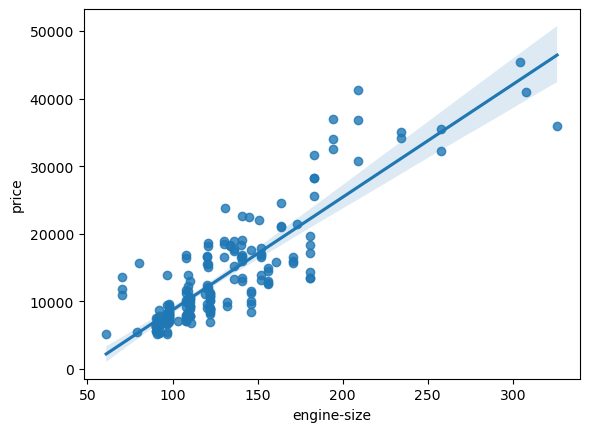

In [168]:
#Lets visualize the SLR between engine size and price in a regression plot. Remeber that this method of charting regression does not train model for future predictions. 
#Only sklearn modules are built for model training as far as we have come now
sns.regplot(x=Cars["engine-size"], y=Cars["price"])
#As we can see, the slope is quite steep and the scatterplot is well within the range, So the model is atl

<Axes: xlabel='engine-size', ylabel='price'>

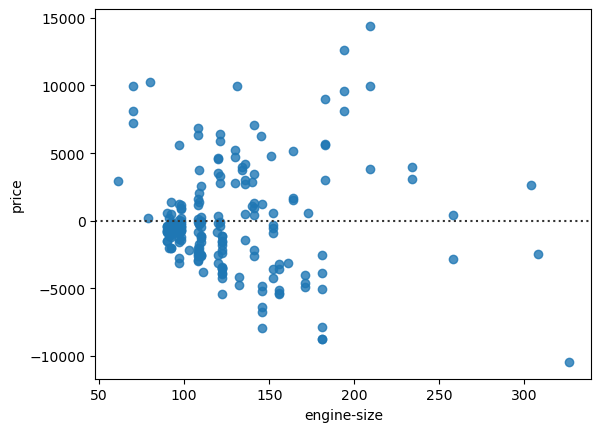

In [169]:
#Lets check the residual plot of the model for further visual screening
sns.residplot(x = Cars["engine-size"], y=Cars["price"])
#A bit of a bursting out trend is observable amongst the residue values. That is not a very good sign of the model fit, but lets keep moving on for now

### Model Evaluation using Visual inspection
#### Multiple Linear Regression Model

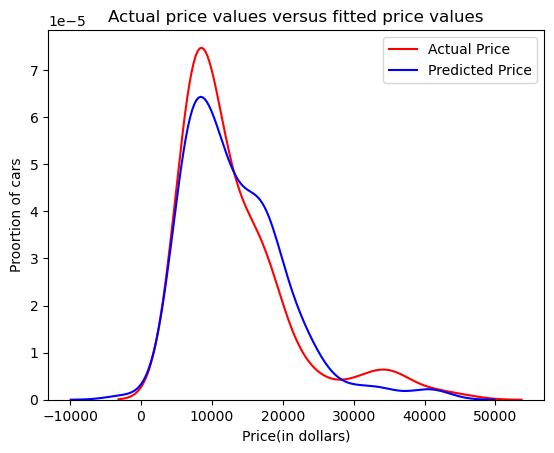

In [172]:
#It is told that it is not possible to check MLRM using regression and residual plot. Hence, it can be only screened through distribution plot
Y = Cars[["price"]]
Z = Cars[["width", "curb-weight", "engine-size", "city-kpl", "highway-kpl"]]

import seaborn as sns
import matplotlib.pyplot as plt

Zhat = lm.fit(Z, Y)
Zhat = lm.predict(Z)
sns.kdeplot(x=Y["price"], color='red', label="Actual Price")
sns.kdeplot(x=Zhat[:, 0], color='blue', label = "Predicted Price")

plt.title("Actual price values versus fitted price values")
plt.xlabel("Price(in dollars)")
plt.ylabel("Proortion of cars")
plt.legend()
plt.show()
#Except for few over and under expectations here and there, the distribution seem to overlap well

### Model Evaluation using in-sample evaluation
#### Simple Linear Regression Model

In [174]:
#Calculating Mean-squared Error to begin with
X=Cars[["highway-kpl"]]
Y = Cars["price"]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(X,Y)
Yhat = lm.predict(X)
mse_SLRM = mean_squared_error(Y, Yhat)
R_squared_SLRM = lm.score(X, Y) #it is strange that they input X and Y value here instead of estimated and actual value
print(mse_SLRM)
print(R_squared_SLRM) #49 percent predictability or better than normal mean in terms of predictability is not very good i guess

31755395.41081296
0.49718675257265266


#### Multiple Linear Regression Model

In [179]:
Z = Cars[["width", "curb-weight", "engine-size", "city-kpl", "highway-kpl"]]
Y = Cars["price"]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(Z, Y)
Yhat = lm.predict(Z)
mse_MLRM = mean_squared_error(Y, Yhat)
R_squared_MLRM = lm.score(Z, Y)
print(mse_MLRM)
print(R_squared_MLRM) #The R_squared score has improved signficiantly with MLRM

12334142.971000047
0.8047018340899017


#### Polynomial regression model of the SLRM

In [183]:
X = Cars[["highway-kpl"]]
Y = Cars["price"]

#we repeat the whole model fitting process because it was done differently previously in a way that didn't output polynomially transformed data 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pr = PolynomialFeatures(degree=2) 
X_pr = pr.fit_transform(X)

scaler = StandardScaler() 
X_pr_scaled = scaler.fit_transform(X_pr)

lm= LinearRegression()
lm.fit(X_pr_scaled, Y)
model = lm.predict(X_pr_scaled)
mse_PRM_SLRM = mean_squared_error(Y, model)
R_squared_PRM_SLRM = lm.score(X_pr_scaled, Y)
print(mse_PRM_SLRM)
print(R_squared_PRM_SLRM)

21973447.80485354
0.6520735923769474


#### Polynomial Regression Model of the MLRM

In [185]:
Z_pr_scaled #our earlimer PRM of the MLRM
Y = Cars["price"]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(Z_pr_scaled, Y)
model = lm.predict(Z_pr_scaled)
mse_PRM_MLRM = mean_squared_error(Y, model)
R_squared_PRM_MLRM = lm.score(Z_pr_scaled, Y)
print(mse_PRM_MLRM)
print(R_squared_PRM_MLRM) 


6206037.040458403
0.9017339385134928


In [187]:
print(mse_SLRM, mse_MLRM, mse_PRM_SLRM, mse_PRM_MLRM)
print(R_squared_SLRM, R_squared_MLRM, R_squared_PRM_SLRM, R_squared_PRM_MLRM)

31755395.41081296 12334142.971000047 21973447.80485354 6206037.040458403
0.49718675257265266 0.8047018340899017 0.6520735923769474 0.9017339385134928


The MLRM and PRM_MLRM achieves better prediction of the Car price via their respective model in comparision to PRM_SRM that does fairly well and SLRM that does
statistically poor

## Model Evaluation and testing - Out-of-Sample Evaluation
In here we shall now improve the predictability of the model by seperating the predictor data into Training data and Test data

Testing the predictibality of out-of-sample data by splitting the data using train_test_split function

In [191]:
y_data = Cars["price"]
x_data = Cars[["width", "curb-weight", "engine-size", "city-kpl", "highway-kpl"]]

#Beginning the train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.40, random_state = 0) #It doesnt matter the number we assign for random_state until
                                                                                                        #we assign the same number every time to ensure consistency in how 
                                                                                                        #the data are split all the time
print(f"x training data is {x_train.shape[0]}")
print(f"x testing data is {x_test.shape[0]}")
print(f"y training data is {y_train.shape[0]}")
print(f"y testing data is {y_test.shape[0]}")
#So its is 60:40 split of row data between training and testing data

x training data is 120
x testing data is 80
y training data is 120
y testing data is 80


### <font color = "red"> Warning!!! </font>
DO NOT PREPROCESS THE DATA WITHOUT SPLITTING THEM INTO TRAINING AND TESTING SETS!! OR ELSE WE RISK DATA SNOOPING OR LEAKAGE!!! 

In [193]:
#Obtaining the prediction data from training and test data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
y_trainhat = lm.predict(x_train)
y_testhat = lm.predict(x_test)
print(y_trainhat[0:5])
print(y_testhat[0:5])

[10101.53490474  7052.37805609 10156.0166988  18170.11272075
 18475.56928293]
[ 4739.82845425 12775.63358952 16197.44621385 20900.22647265
  7219.34555511]


In [194]:
#Now calcualting the R_Squared_Score or predictibility of the different combinations
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train) #fitting the model based on which all further predictions shall be made
Training_score = lm.score(x_train, y_train)
Testing_score = lm.score(x_test, y_test) #we dont need to develop a seperate training model for the test data because you are supposed to evaluate the performance of 
                                         #trained data on unseen data (i.e., test data), not to train the test data before performing prediction
print(Training_score)
print(Testing_score)
#Unfortunately the predictiability in the test batch appeared to have dropped

0.8584304212549516
0.7083975933152652


Visually observing the fit of the training data based prediction in distribution plot 

C:\Users\prien\AppData\Local\Temp\ipykernel_1480\1136870551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color='r', label = "Actual values")
C:\Users\prien\AppData\Local\Temp\ipykernel_1480\1136870551.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

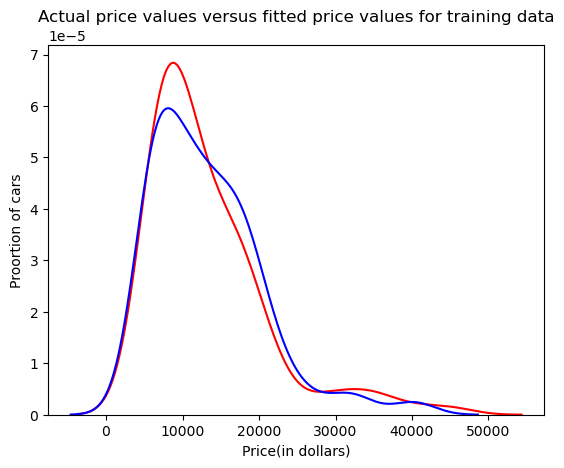

In [202]:
ax1 = sns.distplot(y_train, hist=False, color='r', label = "Actual values")
sns.distplot(y_trainhat, hist=False, color='b', label="fitted values", ax=ax1)

plt.title("Actual price values versus fitted price values for training data")
plt.xlabel("Price(in dollars)")
plt.ylabel("Proortion of cars")
plt.show()

Visually observing the fit of the test data based prediction in distribution plot

C:\Users\prien\AppData\Local\Temp\ipykernel_1480\863650033.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label = "Actual values")
C:\Users\prien\AppData\Local\Temp\ipykernel_1480\863650033.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

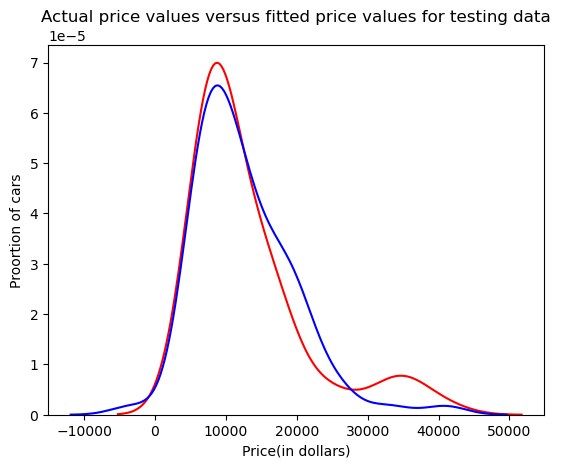

In [205]:
ax1 = sns.distplot(y_test, hist=False, color='r', label = "Actual values")
sns.distplot(y_testhat, hist=False, color='b', label="fitted values", ax=ax1)

plt.title("Actual price values versus fitted price values for testing data")
plt.xlabel("Price(in dollars)")
plt.ylabel("Proortion of cars")
plt.show()
#test data looks smoother but unable to tell. We should rather stick with R_squared_score evaluation 

Performing the prediction in test data through polynomial transformation

In [207]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

pr = PolynomialFeatures(degree=2) #Transforming to second degree polynomial
x_train_pr = pr.fit_transform(x_train) 
    
scaler = StandardScaler()
x_train_pr_scaled = scaler.fit_transform(x_train_pr)

lm = LinearRegression()
lm.fit(x_train_pr_scaled, y_train)
Training_poly_score = lm.score(x_train_pr_scaled, y_train)
Training_poly_score

0.9220263580196091

In [208]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

pr = PolynomialFeatures(degree=2) #Transforming to second degree polynomial
x_test_pr = pr.fit_transform(x_test)

scaler = StandardScaler()
x_test_pr_scaled = scaler.fit_transform(x_test_pr)

lm = LinearRegression()
lm.fit(x_test_pr_scaled, y_test)
Test_poly_score = lm.score(x_test_pr_scaled, y_test)
Test_poly_score

0.9183926045707299

In [209]:
#So now lets compare the R_squared_score between the train and test data in both monomial and polynomial format
print(Training_score, Testing_score, Training_poly_score, Test_poly_score)
#As we can see both training and test score has improved visibily following the transformation to polynomial formats

0.8584304212549516 0.7083975933152652 0.9220263580196091 0.9183926045707299


Although we have resorted to transforming to second degree polynomial and obtained improvements in the score, we could try 
other polynomial degrees simulataneously too see the number of degree that can produce the highest R_squared score in the test data category 

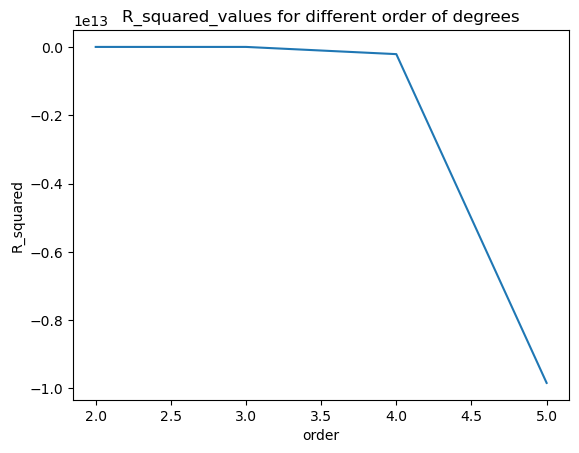

In [214]:
R_squared_values = []

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

Category = [2, 3, 4, 5]
for n in Category:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)

    Scaler = StandardScaler()
    x_train_pr_scaled = Scaler.fit_transform(x_train_pr)
    x_test_pr_scaled = Scaler.fit_transform(x_test_pr)

    lm = LinearRegression()
    x_trainhat = lm.fit(x_train_pr_scaled, y_train)
    R_squared_values.append(lm.score(x_test_pr_scaled, y_test))

plt.plot(Category, R_squared_values)
plt.xlabel("order")
plt.ylabel("R_squared")
plt.title("R_squared_values for different order of degrees")
plt.show()

As we can see although higher order degreed polynomials perform well in the contexts of training data in terms of R_squared score, the predictability falls once the
polynomial attempts to fit the pattern of the target value without filtering out the noise. Although the predictability improves with increasing degree of polynomial the
performs can plateau eventually in terms of prediction of unseen data or as soon as after the second degree as in our case. Hence, care should be taken to make sure
the predictor is not transformed to higher order polynomial without care to avoid overfitting problem. 

As such, higher the alpha moderator, the more is the polynomial behavior moderated against overfitting

### Ridge Regression
While deploying the optimal degree of polynomial is a good way to avoid overfitting of the data, moderating the behavior of the polynomial regardless of the 
degree order is another way to moderate the overfitting attribute of higher-order polynomials. And, such can be accomplished through the application of a penalty term (i.e., alpha) of the ridge regression. The penalization term in Ridge regression relies on a sum-of-squared penalty on its coefficients, also known as L2. Ridge regression is also better at handling multicollinear feature sets than other regression methods, such as normal OLS and LASSO regression. However, LASSO 
Regression is the best choice for datasets with irrelevant feature sets. 

In summary, Ridge Regression is a hyperparameter-based regression method committed to preventing the amplification of impact from irrelevant feature data and overfitting. Since Linear Regression Model (i.e., LinearRegression()) performs poorly with datasets with irrelevant features (i.e., often the case in real-world scenarios), hyperparameter based regressions such as Ridge and LASSO Regression becomes the go-to choice.   

In [218]:
y_data = Cars["price"]
x_data = Cars[["width", "curb-weight", "engine-size", "city-kpl", "highway-kpl"]]

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

scaler = StandardScaler()
x_train_pr_scaled = scaler.fit_transform(x_train_pr)
x_test_pr_scaled = scaler.fit_transform(x_test_pr)

from sklearn.linear_model import Ridge
import numpy as np
Moderators = np.arange(1,10,1) #lets range the alpha value from 1 to 10 added by 1 each time

Train_score =[]
Test_score = []
for numbers in Moderators: #testing the R_squared score for all range of alpha moderator for both train and test data in terms of predictability
    Rigemodel = Ridge(alpha=numbers)
    Rigemodel.fit(x_train_pr_scaled, y_train)
    Train_score.append(Rigemodel.score(x_train_pr_scaled, y_train))
    Test_score.append(Rigemodel.score(x_test_pr_scaled, y_test))
print(Train_score)
print(Test_score) #It is said that trialing the best hyperparameter on test score is not a good practice. Trialing of the hyperparameter or model fit should only be tried on
                  #training data or evaluation data (i.e., the mock testing data), but never on testing data. Testing data should only be used for the final prediction 
                  # Otherwise, the model can overfit. That's called Data Snooping or leakage. Cross Validation Evaluation discussed below is a great to avoid Data snooping

[0.9098125952923349, 0.9058751216044416, 0.9036784682438442, 0.9021429474117283, 0.9009507516315045, 0.8999695056442406, 0.8991324514882787, 0.8984013124630847, 0.8977519938722395]
[0.7713815102983625, 0.7636554559843081, 0.7577221597952926, 0.7529878108424825, 0.7490594005778903, 0.7457147511640885, 0.7428163256478388, 0.7402717921452653, 0.7380153342655886]


Text(0, 0.5, 'Train_score')

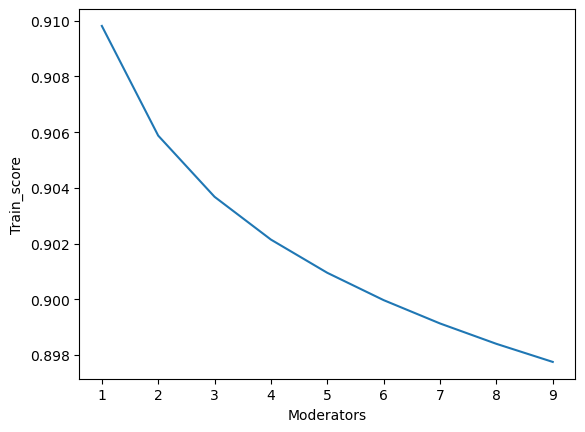

In [219]:
plt.plot(Moderators, Train_score)
plt.xlabel("Moderators")
plt.ylabel("Train_score")
#The prediction ability appear to decrease as the polynomial behavior is more restrained or moderated due to underfitting

Text(0, 0.5, 'Test_score')

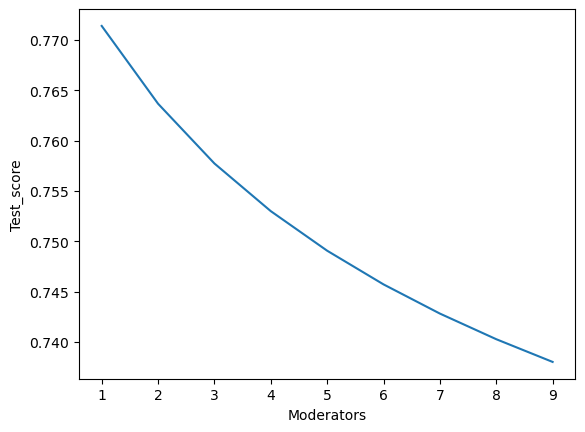

In [220]:
plt.plot(Moderators, Test_score)
plt.xlabel("Moderators")
plt.ylabel("Test_score")
#The prediction ability appear to decrease as the polynomial behavior is more restrained or moderated due to underfitting

#### Below are the demonstrations of "Data Snooping" (Fig 1) and method to prevent "Data Snooping" by generating evaluation data (Fig 2) 
Fig 1
<left>
    <img src="Data Snooping.JPG" width="500" alt="Data Snooping">
</left>

Fig 2
<left>
    <img src="fig 2.JPG" width="500" alt="Data Snooping">
</left>

### Least Absolute Shrinkage and Selection Operator (LASSO) Regression
LASSO Regression is another hyperparameter-based regression method that relies on L1 penalty terms in the form of a sum of absolute value penalties on its coefficients. LASSO regression is very useful for working with datasets in which only a few (say 30 percent) features correlate with the target value. This regression method effectively eliminates the impact of feature sets irrelevant to the target value in the final model. Hence, LASSO Regression performs well in environments that observe low Signal-to-Noise Ratio (SNR). 

In [229]:
# We will work with the Cars data that was earlier used for Ridge Regression. However, this time we shall not poly transform the data, but split the data into train
#evaluation, and test batches. 
y_data = Cars["price"]
x_data = Cars[["width", "curb-weight", "engine-size", "city-kpl", "highway-kpl"]]

#Now, splitting the data into train, eval, and test sets before any preprocessing can happen
from sklearn.model_selection import train_test_split
x_train_eval, x_test, y_train_eval, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 0)
x_train, x_eval, y_train, y_eval = train_test_split(x_train_eval, y_train_eval, test_size = 0.3, random_state = 0)

print(x_train.shape[0])
print(y_train.shape[0])

print(x_eval.shape[0])
print(y_eval.shape[0])

print(x_test.shape[0])
print(y_test.shape[0])

98
98
42
42
60
60


In [231]:
#Now standardizing the independent variables for all batches
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_eval_scaled = scaler.fit_transform(x_eval)
x_test_scaled = scaler.fit_transform(x_test)

In [236]:
#Now pursuing the LASSO regression with different parameters
import numpy as np
from sklearn.linear_model import Lasso

parameters = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Train_score = []
Eval_score = []
for nums in parameters:
    ls = Lasso(alpha = nums)
    ls.fit(x_train_scaled, y_train)
    Train_score.append(ls.score(x_train_scaled, y_train))
    Eval_score.append(ls.score(x_eval_scaled, y_eval))

print(Train_score)
print(Eval_score)

[0.8095818586244856, 0.8095747106941434, 0.8095627382414291, 0.8095459431487123, 0.8095243014358646, 0.8094978502205896, 0.8094665740317186, 0.8094304728725387, 0.8093895466385945, 0.8093437954706088]
[0.8431041329764999, 0.8426616776266438, 0.8422150114155262, 0.8417643576155532, 0.8413090376650973, 0.8408502051199359, 0.8403873243238649, 0.8399203965808134, 0.8394494210760337, 0.8389744003468405]


Text(0, 0.5, 'R squared score')

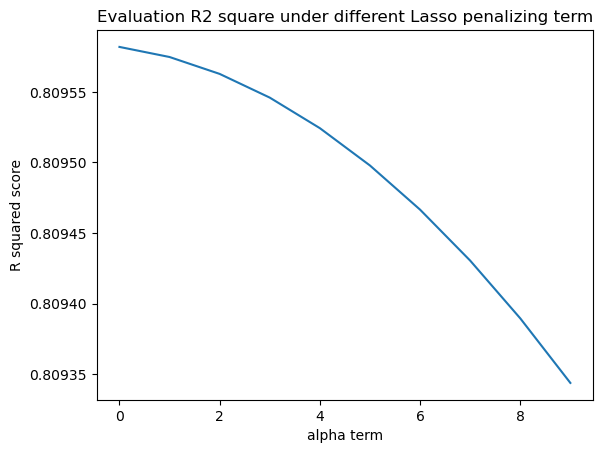

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(Train_score)
plt.title("Evaluation R2 square under different Lasso penalizing term")
plt.xlabel("alpha term")
plt.ylabel("R squared score")
# As we can see here, the performance of the model decreases with higher penalties. Therefore, the model never needed coefficient moderation in the first place
# Maybe normal linear regression would have been better. Anyway, for now we shall stick to the lowest alpha in out test batch

In [238]:
for i, nums in enumerate(Eval_score):
    print((i+1)*10, nums)

10 0.8431041329764999
20 0.8426616776266438
30 0.8422150114155262
40 0.8417643576155532
50 0.8413090376650973
60 0.8408502051199359
70 0.8403873243238649
80 0.8399203965808134
90 0.8394494210760337
100 0.8389744003468405


In [239]:
#Now administering the alpha value with the highest R2 score for our test variable
ls = Lasso(alpha = 10)
ls.fit(x_train_scaled, y_train)

print(f"The first predictions on unseen data are {ls.predict(x_test_scaled)[0:10]}")
print(f"The R2 score is {ls.score(x_test_scaled, y_test)}")
# It appears the model performed worse in our test set. This forces us not to discard overfitting possibilities or in fact, data snooping or leakage!!!  In the model. 
#Maybe we need to check for outliers in the features through clustering functions such as HDBSCAN to remove noise. It is although Lasso is supposed to perform well 
#with datasets with low SNR, regressions can also be performed with other algorithms such as normal OLS and Ridge. polynomial fits of differing degree or 2nd order degree 
#may also be adjusted in the regression pipeline. 

The first predictions on unseen data are [ 5336.38161639 12103.95445076 15832.94450748 20805.00731888
  8105.13381627  8416.83842428 17923.40004232  6427.47186094
 18546.25517386  7663.19357572]
The R2 score is 0.7235745392249213


While the Linear Regression, Ridge Regression, and LASSO Regression are all regression algorithms attempting to explain the degree of one-way relationship between the independent and dependent variables, the three regression algorithms have been essentially compared across different datasets. Below demonstrates the comparison of the algorithms in datasets with distinct SNR and sparseness (i.e., referring to datasets in terms of proportion of empty or zero-valued data). 
<left>
    <img src="Performance.JPG" width="800" alt="Data Snooping">
</left>

### Grid Search

Although we may be able to visually interpret the best penalizing term to moderate coefficients in the regression model. Deploying the Grid Search algorithm can greatly assist in finding the best estimating hyperparameter or penalizing value that offers the highest R-squared Score. 

In [247]:
y_data = Cars["price"]
x_data = Cars[["width", "curb-weight", "engine-size", "city-kpl", "highway-kpl"]]

#Lets try and find the best estimating parameter from our original dataset
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

parameters = [{"alpha" : [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]
RR = Ridge()
Grid = GridSearchCV(RR, parameters, cv=4)#consult Cross Validation Evaluation method to learn that cv=4 means dividing the data sets into four folds as 
                                         #training and testing data
Grid.fit(x_data, y_data) #we dont need to apply training data here because GridsearchCV function already does it using the Cross validation Evaluation method
BestRR = Grid.best_estimator_
print(BestRR)
print(BestRR.score(x_data, y_data))
#It is weired that the best estimator is at alpha=1000, because higher moderation have often led to model underfiting

Ridge(alpha=1000)
0.7983246089315942


### Cross Validation Evaluation

In [249]:
#Although train_test_splitting method helps to specify test data for prediction analysis, it can have biasness error. splitting the data
#using the cross validation evaluation method is a good way to eliminate such biasness
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#in here we are processing raw x and y data without preprocessing. It is generally advised to preprocess the data before they are processed through robust methods such as CVE
lm = LinearRegression()
Rcross = cross_val_score(lm, x_data, y_data, cv=4) #this process involve everything from the splitting of data into train & test datas until analyzing the predictability
                                                   #of the sample test data pairs (i.e., both independent & dependent variables)
Rcross

array([0.83290645, 0.82964051, 0.51866956, 0.52189711])

In [250]:
#However, we can average the data to create a single score representation of the predictability accuracy of the model deployed in out-of-sample data
print(Rcross.mean())
print(Rcross.std()) #just to measure the distribution of the scores away from the mean

0.675778406770533
0.15550354429180302


In [251]:
#Scores from different splitting methods to create out-of-sample data can be compared too
print(Testing_score)
print(Rcross.mean())
#The predictability of the model appeared to have fallen from 70% to 67.5% when Cross validation evaluation technique is applied

0.7083975933152652
0.675778406770533


In [252]:
#Predicted data (i.e., stiching all y_test data from all four folds in our case) can also be generated
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lm, x_data, y_data, cv=4)
yhat[0:10]

array([12653.46686644, 17039.78923781, 10858.24194519, 15481.14966802,
       14993.74134815, 19065.19415401, 19293.5877131 , 18756.79246796,
       10108.85786479, 10108.85786479])